<a href="https://colab.research.google.com/github/John-Richard-Bercades/-CSST106-4B/blob/main/4B_BERCADES_EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apply image processing techniques (scaling, rotation, blurring, edge detection) using OpenCV**

## **Install Opencv**

In [1]:
!pip install opencv-python-headless


## **Import Libraries**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## **Functions**

In [3]:
def display_image(image, title='image'):
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_image_gray(img1,img2,title="image1",title2="image2"):
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2BGR))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2BGR))
    plt.title(title2)
    plt.axis('off')

    plt.show()

## **Load Image**

Saving IMG_20240909_141722_559.jpg to IMG_20240909_141722_559.jpg


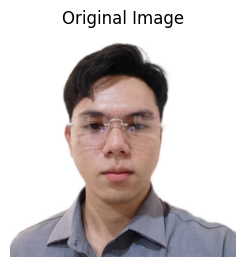

In [4]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image,"Original Image")

### **EXERCISE 1. Scaling and Rotating**

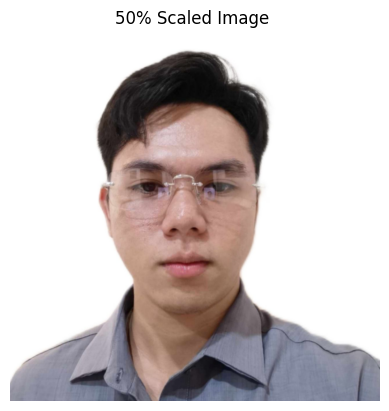

In [5]:
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img,(int (width * scale_factor),int (height * scale_factor)), interpolation = cv2.INTER_LINEAR)
    return scaled_img

# Apply Scaled Image to the uploaded image
scaled_image =scale_image(image, 0.5)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("50% Scaled Image ")
plt.axis('off')
plt.show()

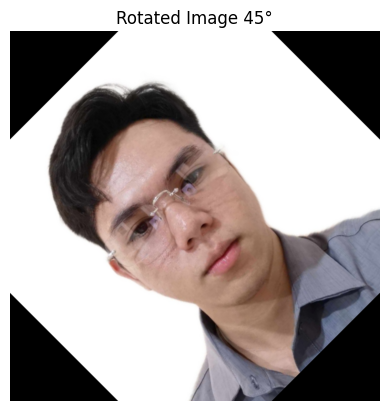

In [21]:
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (width, height))
    return rotated_img

# Apply Roate Image to the uploaded image
rotated_image = rotate_image(image, 45)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image 45°")
plt.axis('off')
plt.show()

****

### **EXERCISE 2. Blurring Techniques**

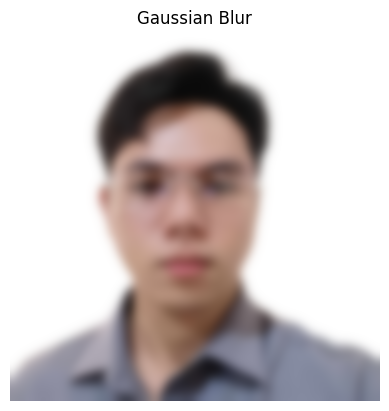

In [7]:
#Gaussian Blur
def gaussian_blur(img):
  gaussian_blur = cv2.GaussianBlur(image,(111,111),0)
  return gaussian_blur
# Apply Gaussian Blur to the uploaded image
gaussian_blurred = gaussian_blur(image)
plt.imshow(cv2.cvtColor(gaussian_blurred, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')
plt.show()

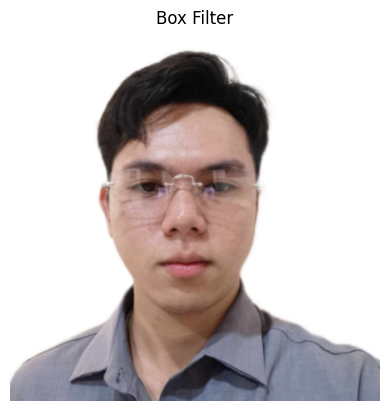

In [8]:
#Box Filter
def box_blur(img):
  box = cv2.boxFilter(img, -1, (5, 5))
  return box
# Apply Box filter to the uploaded image
box_blurred = box_blur(image)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')
plt.show()

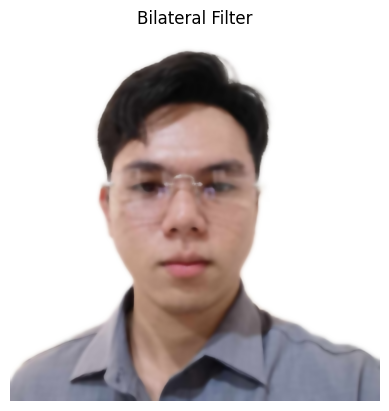

In [9]:
#Bilateral Filter
def bilateral_filter(img):
  bilateral_filter = cv2.bilateralFilter(image,19,175,175)
  return bilateral_filter
# Apply Bilateral filter to the uploaded image
bilateral_blurred = bilateral_filter(image)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')
plt.show()

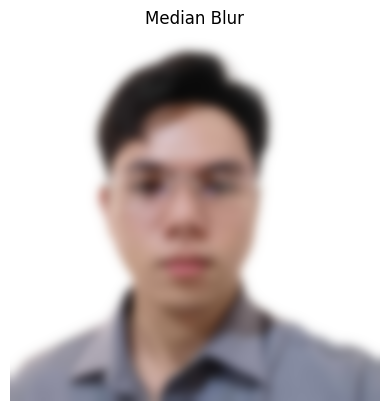

In [10]:
#Median Blur
def median_blur(img):
  median_blur = cv2.medianBlur(image,111)
  return median_blur
# Apply Median Blur to the uploaded image
median_blurred = gaussian_blur(image)
plt.imshow(cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')
plt.show()

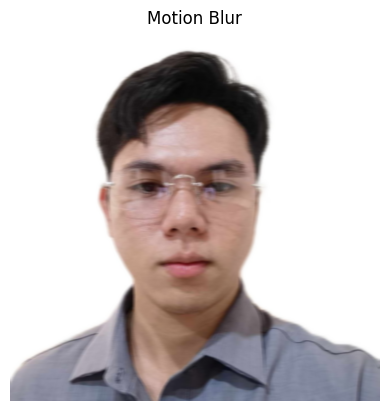

In [11]:
# Motion Blur
def motion_blur(img):
# Create motion blur kernel (size 15x15)
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size
# Apply motion blur
  motion_blurred = cv2.filter2D(img, -1, kernel)
  return motion_blurred
# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

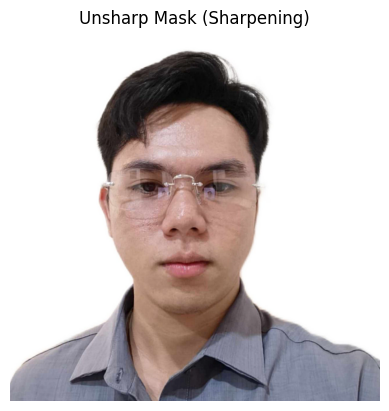

In [12]:
# Unsharp Masking (Sharpening)
def unsharp_mask(img):
# Create a Gaussian blur version of the image
    blurred = cv2.GaussianBlur(img, (9, 9), 10.0)

# Sharpen by adding the difference between the original and the blurred image
    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    return sharpened

# Apply Unsharp Masking to the uploaded image
sharpened_image = unsharp_mask(image)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()

### **EXERCISE 3. Edge Detection**

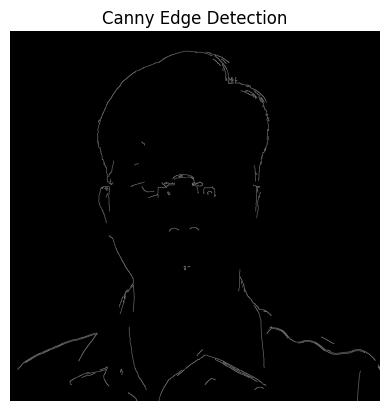

In [13]:
def canny_edges(img):
  canny_edges = cv2.Canny(image,100,200)
  return canny_edges

# Apply Median Blur to the uploaded image
canny_edges_detected = canny_edges(image)
plt.imshow(cv2.cvtColor(canny_edges_detected, cv2.COLOR_BGR2RGB))
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

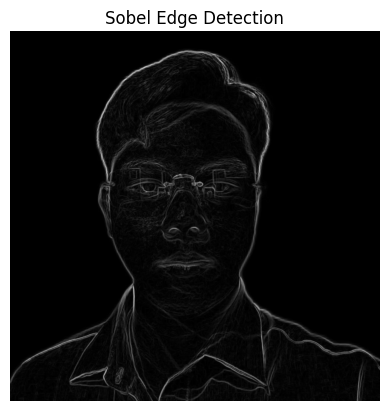

In [14]:
# Sobel Edge Detection
def sobel_edge_detection(img):
# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Sobel edge detection in the x direction
  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
# Sobel edge detection in the y direction
  sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
# Combine the two gradients
  sobel_combined = cv2.magnitude(sobelx, sobely)
  return sobel_combined
# Apply Sobel edge detection to the uploaded image
sobel_edges = sobel_edge_detection(image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

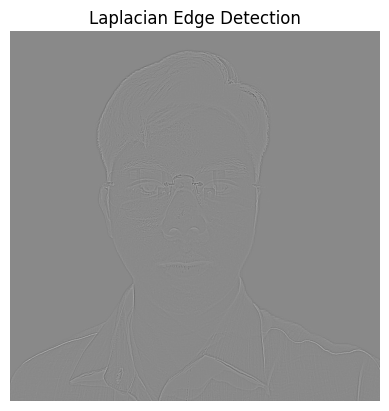

In [15]:
# Laplacian Edge Detection
def laplacian_edge_detection(img):
# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply Laplacian operator
  laplacian = cv2.Laplacian(gray, cv2.CV_64F)
  return laplacian
# Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

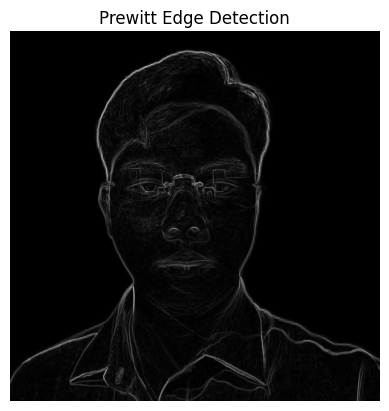

In [16]:
# Prewitt Edge Detection
def prewitt_edge_detection(img):
# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Prewitt operator kernels for x and y directions
  kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
  kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
# Applying the Prewitt operator
  prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
  prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
# Combine the x and y gradients by converting to floating point
  prewitt_combined = cv2.magnitude(prewittx, prewitty)
  return prewitt_combined
# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()

### **EXERCISE 4: Basic Image Processor (Interactive)**

Enter action (scale, rotate, gaussian_blur, median_blur, canny): canny


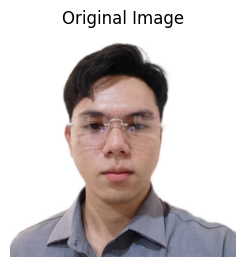

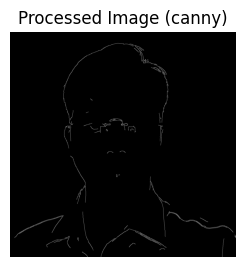

In [18]:
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (111,111), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, )
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  else:
    return img

    process_image()

action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny): ")
processed_image = process_image(image, action)
display_image(image, "Original Image")
display_image(processed_image, f"Processed Image ({action})")


Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_filter, box_blur, motion_blur): motion_blur


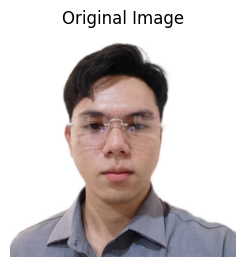

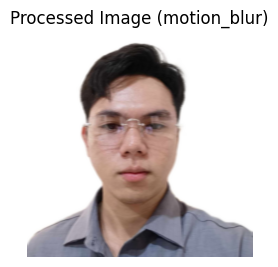

In [19]:
# Update process_image function to include new blurring techniques
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  elif action == 'sobel':
    return sobel_edge_detection(img)
  elif action == 'laplacian':
    return laplacian_edge_detection(img)
  elif action == 'prewitt':
    return prewitt_edge_detection(img)
  elif action == 'bilateral_filter':
    return bilateral_filter(img)
  elif action == 'box_blur':
    return box_blur(img)
  elif action == 'motion_blur':
    return motion_blur(img)
  elif action == 'unsharp_mask':
    return unsharp_mask(img)
  else:
    return img
# Add new blurring options for interactive processing
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_filter, box_blur, motion_blur): ")
processed_image = process_image(image, action)

# Call display_image with the correct number of arguments
display_image(image, "Original Image")
display_image(processed_image, f"Processed Image ({action})")

### **EXERCISE 5: Comparison of Filtering Techniques**

                                               Blurring Techniques Comparison                                                


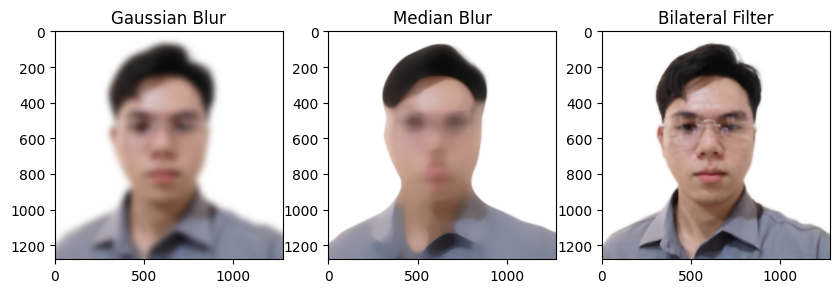

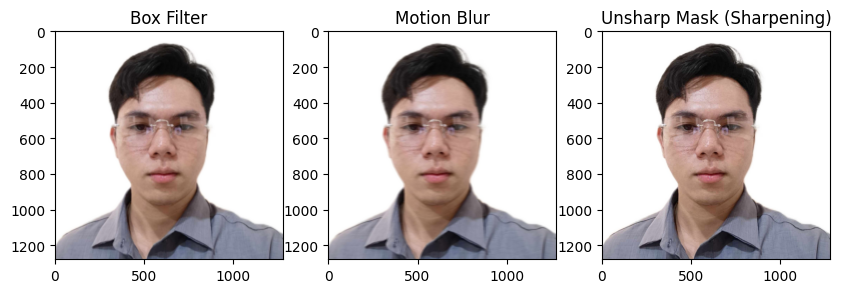

In [29]:
gaussian_blur = cv2.GaussianBlur(image,(111,111),0)
box = cv2.boxFilter(image, -1, (5, 5))
bilateral_filter = cv2.bilateralFilter(image,19,175,175)
median_blur = cv2.medianBlur(image,111)
kernel_size = 15
kernel = np.zeros((kernel_size, kernel_size))
kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
kernel = kernel / kernel_size
motion_blurred = cv2.filter2D(image, -1, kernel)
blurred = cv2.GaussianBlur(image, (9, 9), 10.0)
sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike
Gaussian or median filters. It’s useful for reducing noise while preserving details.
"""
#Blurring Techniques Comparison

# Display the results for Blurring Comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.show()

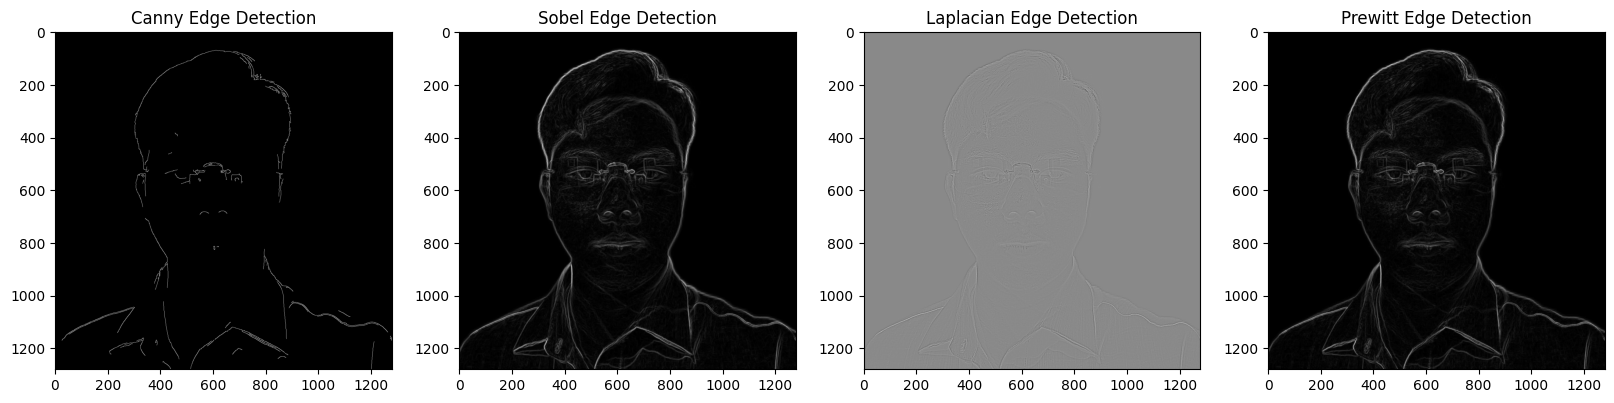

In [35]:
canny_edges = cv2.Canny(image,100,200)
sobel_edges = sobel_edge_detection(image)
laplacian_edges = laplacian_edge_detection(image)
prewitt_edges = prewitt_edge_detection(image)

#Edge Detection Techniques Comparison

#Display the results for Edge Detections Comparison
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(canny_edges, cv2.COLOR_BGR2RGB))
plt.title("Canny Edge Detection")
plt.subplot(1, 4, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.subplot(1, 4, 3)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.subplot(1, 4, 4)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.show()
